In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import os
import cv2


In [ ]:
# Mount Google Drive if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the paths to your image folders
motion_blur_path = "/content/drive/MyDrive/Google Colab/Machine_Learning/data/thesis/images/motion_blurred"
defocused_blur_path = "/content/drive/MyDrive/Google Colab/Machine_Learning/data/thesis/images/defocused_blurred"
sharp_images_path = "/content/drive/MyDrive/Google Colab/Machine_Learning/data/thesis/images/sharp"



In [ ]:
# Function to load and convert images to grayscale arrays
def load_images_and_labels(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
      img = cv2.imread(os.path.join(folder_path, filename), cv2.IMREAD_GRAYSCALE)
      images.append(img)
      labels.append(label)



    return images, labels

# Load images from each folder and assign labels
motion_blur_images, motion_blur_labels = load_images_and_labels(motion_blur_path, label=0)
defocused_blur_images, defocused_blur_labels = load_images_and_labels(defocused_blur_path, label=1)
sharp_images, sharp_labels = load_images_and_labels(sharp_images_path, label=2)

# Concatenate all images and labels
all_images =  motion_blur_images + defocused_blur_images + sharp_images
all_labels =  motion_blur_labels + defocused_blur_labels + sharp_labels


In [ ]:
# Define function to perform gradient calculation and histogram generation

def process_image(image):
    # Calculate gradients using Sobel operators
    x_gradient_array = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    y_gradient_array = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate magnitude of gradients
    magnitude_of_x_y = np.sqrt(x_gradient_array ** 2 + y_gradient_array ** 2)

    max_mag=np.max(magnitude_of_x_y)
    min_mag=np.min(magnitude_of_x_y)

    # Calculate histogram of magnitude
    hist_mag, _ = np.histogram(magnitude_of_x_y.ravel(), bins=np.arange(0, 951, 50))

    hist_mag_df = pd.DataFrame(hist_mag.reshape(1, -1))

    # Calculate histogram of directions
    direction = np.arctan2(y_gradient_array, x_gradient_array)
    max_dir=np.max(direction)

    min_dir=np.min(direction)

    hist_dir, _ = np.histogram(direction.ravel(), bins=np.arange(-4, 5))
    hist_dir_df = pd.DataFrame(hist_dir.reshape(1, -1))

    return hist_mag_df, hist_dir_df,max_mag,min_mag,max_dir,min_dir

In [ ]:
#Execution time 7 minutes +
# Process all images
hist_mag_list = []
hist_dir_list = []
for img in all_images:
    hist_mag_df, hist_dir_df, max_mag, min_mag, max_dir, min_dir = process_image(img)
    tem_max_mag=max_mag
    if max_mag > tem_max_mag:
      tem_max_mag=max_mag

    tem_min_mag=min_mag
    if min_mag < tem_min_mag:
      tem_min_mag=min_mag

    tem_max_dir=max_dir
    if max_dir > tem_max_dir:
      tem_max_dir=max_dir


    tem_min_dir=min_dir
    if min_dir < tem_min_dir:
      tem_min_dir=min_dir


    hist_mag_list.append(hist_mag_df)
    hist_dir_list.append(hist_dir_df)

# Concatenate dataframes
final_hist_mag = pd.concat(hist_mag_list, ignore_index=True)
final_hist_dir = pd.concat(hist_dir_list, ignore_index=True)

print('Magnitude_Max_Min:',tem_max_mag, tem_min_mag)
print('Direction_Max_Min:',tem_max_dir, tem_min_dir)


Magnitude_Max_Min: 948.7138662420825 0.0
Direction_Max_Min: 3.141592653589793 -3.138743658449031


In [ ]:
# Define the bin ranges for magnitude and direction histograms
mag_bins = np.arange(0, 951, 50)
dir_bins = np.arange(-4, 5)

# Function to generate column names based on bin ranges
def generate_column_names(bins):
    column_names = []
    for i in range(len(bins) - 1):
        column_names.append(f'{bins[i]}-{bins[i+1]}')
    return column_names

# Generate column names for magnitude and direction histograms
mag_column_names = generate_column_names(mag_bins)
dir_column_names = generate_column_names(dir_bins)

# Assign column names to the DataFrame
final_hist_mag.columns = mag_column_names
final_hist_dir.columns = dir_column_names


Extra Code

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate magnitude and direction histograms of a image for ploting a chart.
def calculate_histograms(image):
    # Calculate gradients using Sobel operators
    x_gradient_array = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    y_gradient_array = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate magnitude of gradients
    magnitude_of_x_y = np.sqrt(x_gradient_array ** 2 + y_gradient_array ** 2)

    # Calculate direction of gradients
    direction = np.arctan2(y_gradient_array, x_gradient_array)

    # Calculate histograms
    max_mag = np.max(magnitude_of_x_y)
    mag_hist, mag_bins = np.histogram(magnitude_of_x_y.ravel(), bins=int(max_mag), range=(0, max_mag))
    dir_hist, dir_bins = np.histogram(direction.ravel(), bins=4, range=(-np.pi, np.pi))

    return mag_hist, mag_bins, dir_hist, dir_bins

# Load image
image = cv2.imread('/content/drive/MyDrive/Google Colab/Machine_Learning/data/thesis/images/3_HUAWEI-NOVA-LITE_F.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate histograms
mag_hist, mag_bins, dir_hist, dir_bins = calculate_histograms(image)



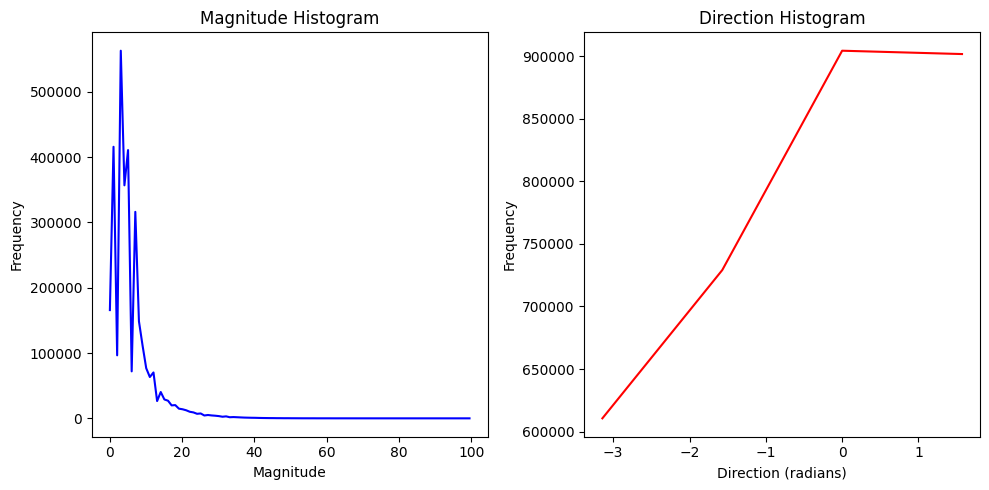

In [ ]:
# Plot magnitude histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(mag_bins[:-1], mag_hist, color='b')
plt.title('Magnitude Histogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')

# Plot direction histogram
plt.subplot(1, 2, 2)
plt.plot(dir_bins[:-1], dir_hist, color='r')
plt.title('Direction Histogram')
plt.xlabel('Direction (radians)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:

# Convert labels list to a DataFrame
labels_df = pd.DataFrame({'label': all_labels})

# Concatenate final_hist_mag, final_hist_dir, and labels_df along columns
merged_df = pd.concat([final_hist_mag, final_hist_dir], axis=1)



In [ ]:
print(labels_df.size)

1050


In [ ]:
merged_df.head()

,0-50,50-100,100-150,150-200,200-250,250-300,300-350,350-400,400-450,450-500,...,850-900,900-950,-4--3,-3--2,-2--1,-1-0,0-1,1-2,2-3,3-4
0,3008220,112891,15955,4170,1603,944,558,351,273,280,...,0,0,35340,496530,519041,448775,547656,505648,486960,105778
1,2954732,154979,23503,7306,2909,1153,567,242,173,128,...,0,0,35910,437555,498698,438371,690624,496232,466388,81950
2,2940170,120676,45881,22574,9863,3670,1027,512,547,487,...,0,0,67058,365022,419533,383659,949930,428929,370056,161541
3,2769275,13908,3909,2392,1408,1061,749,582,461,391,...,42,3,18384,420809,439286,422012,499966,432653,459343,103067
4,3082964,56949,4722,870,196,27,0,0,0,0,...,0,0,28556,509836,552255,460123,534593,489361,467451,103553


In [ ]:
#new first_df use in the second part
new_first_df = merged_df.iloc[:-350]

In [ ]:
from sklearn.preprocessing import StandardScaler


# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(merged_df)

print("\nScaled data using Standardization:")
print(scaled_data)



Scaled data using Standardization:
[[ 5.25865386e-01 -1.68721818e-01 -3.67855209e-01 ...  3.35363056e-01
   5.23125880e-01  4.02255980e-02]
 [ 4.01714600e-01  1.03039302e-01 -2.64284496e-01 ...  2.21169464e-01
   2.26098584e-01 -9.46456161e-01]
 [ 3.67914799e-01 -1.18454275e-01  4.27776944e-02 ... -5.95055186e-01
  -1.16478385e+00  2.34928783e+00]
 ...
 [-5.72830076e-01  9.75499164e-01  9.72704931e-01 ...  3.83339888e-01
  -1.07891082e-01 -3.47651970e-02]
 [ 2.07833446e-01  5.10412906e-02  1.84823802e-01 ... -6.94687501e-02
   3.22027485e-01  2.46315707e-01]
 [-5.77769442e-04  4.58004987e-01  3.72905911e-01 ...  8.30966052e-02
   8.52509688e-01  1.16293014e-01]]


In [ ]:
from sklearn.model_selection import train_test_split

X = scaled_data
y = labels_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)


In [ ]:
#from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X = scaled_data
y = labels_df

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.7492063492063492

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.62      0.65       114
           1       0.75      0.80      0.78       112
           2       0.82      0.84      0.83        89

    accuracy                           0.75       315
   macro avg       0.75      0.76      0.75       315
weighted avg       0.75      0.75      0.75       315



#second part

In [ ]:
import cv2
import numpy as np
from skimage import restoration
import pandas as pd
import os
from multiprocessing import Pool

In [ ]:


def spatial_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate spatial features
    mean_intensity = np.mean(gray_image)
    std_dev_intensity = np.std(gray_image)

    # Calculate edge features using Canny edge detector
    edges = cv2.Canny(gray_image, 50, 150)
    edge_density = np.sum(edges) / (gray_image.shape[0] * gray_image.shape[1])

    return [mean_intensity, std_dev_intensity, edge_density]

def frequency_features(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = 20 * np.log(np.abs(f_transform_shifted))

    # Calculate frequency features
    mean_spectrum = np.mean(magnitude_spectrum)
    std_dev_spectrum = np.std(magnitude_spectrum)

    # PSF recovery
    psf_size = 5
    psf = np.ones((psf_size, psf_size)) / psf_size**2
    blurred_image = restoration.wiener(gray_image, psf, 0.01)
    initial_psf = np.random.rand(psf_size, psf_size)
    recovered_psf, _ = restoration.unsupervised_wiener(blurred_image, initial_psf)

    # Calculate FWHM from PSF matrix
    fwhm = calculate_fwhm(recovered_psf)

    return [mean_spectrum, std_dev_spectrum, fwhm]



def calculate_fwhm(psf_matrix):
    # Find the maximum intensity value in the PSF matrix
    max_intensity = np.max(psf_matrix)

    # Find the indices where the intensity is greater than half of the maximum intensity
    above_half_max = psf_matrix > 0.5 * max_intensity

    # Find the first and last indices where the intensity is above half of the maximum
    first_index = np.argmax(above_half_max)
    last_index = len(above_half_max) - 1 - np.argmax(above_half_max[::-1])

    # Calculate the FWHM
    fwhm = abs(last_index - first_index)

    return fwhm

def extract_features(image):
    spatial_feats = spatial_features(image)
    frequency_feats = frequency_features(image)
    return spatial_feats + frequency_feats

def load_images_and_labels(image_folder, label, resize_shape):
    images = []
    labels = []
    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        image = cv2.imread(image_path)
        resized_image = cv2.resize(image, resize_shape)
        images.append(resized_image)
        labels.append(label)
    return images, labels

# Define image resize shape
resize_shape = (255, 255)

# Load images and labels from the motion blurred folder
motion_blurred_folder = "/content/drive/MyDrive/Google Colab/Machine_Learning/data/thesis/images/motion_blurred"
motion_blurred_images, motion_blurred_labels = load_images_and_labels(motion_blurred_folder, label=0, resize_shape=resize_shape)

# Load images and labels from the defocused blurred folder
defocused_blurred_folder = "/content/drive/MyDrive/Google Colab/Machine_Learning/data/thesis/images/defocused_blurred"
defocused_blurred_images, defocused_blurred_labels = load_images_and_labels(defocused_blurred_folder, label=1, resize_shape=resize_shape)


# Load images and labels from the sharp folder
#sharp_images_folder = "/content/drive/MyDrive/Google Colab/Machine_Learning/data/thesis/images/sharp"
#sharp_images, sharp_labels = load_images_and_labels(sharp_images_folder, label=2, resize_shape=resize_shape)



# Concatenate data
images = motion_blurred_images + defocused_blurred_images
labels = motion_blurred_labels + defocused_blurred_labels

# Extract features using multiprocessing
with Pool() as pool:
    X = pool.map(extract_features, images)

# Create DataFrame
feature_names = ["mean_intensity", "std_dev_intensity", "edge_density",
                 "mean_spectrum", "std_dev_spectrum", "fwhm"]
df = pd.DataFrame(X, columns=feature_names)
#df['Label'] = labels

# Save DataFrame to CSV file
df.to_csv("image_features.csv", index=False)


In [ ]:
df.head()

,mean_intensity,std_dev_intensity,edge_density,mean_spectrum,std_dev_spectrum,fwhm
0,142.318139,52.269928,15.215686,137.639950,21.645467,234
1,158.697132,49.427908,22.231373,142.490675,21.860345,5366
2,178.920369,70.597283,29.615686,133.856946,24.204731,12
3,15.275725,22.004431,6.113725,139.420758,19.021552,37293
4,122.392710,52.360499,8.647059,128.788894,18.561009,570


In [ ]:
merged_df_full = pd.concat([new_first_df, df], axis=1)

In [ ]:
merged_df_full.head()

,0-50,50-100,100-150,150-200,200-250,250-300,300-350,350-400,400-450,450-500,...,0-1,1-2,2-3,3-4,mean_intensity,std_dev_intensity,edge_density,mean_spectrum,std_dev_spectrum,fwhm
0,3008220,112891,15955,4170,1603,944,558,351,273,280,...,547656,505648,486960,105778,142.318139,52.269928,15.215686,137.639950,21.645467,234
1,2954732,154979,23503,7306,2909,1153,567,242,173,128,...,690624,496232,466388,81950,158.697132,49.427908,22.231373,142.490675,21.860345,5366
2,2940170,120676,45881,22574,9863,3670,1027,512,547,487,...,949930,428929,370056,161541,178.920369,70.597283,29.615686,133.856946,24.204731,12
3,2769275,13908,3909,2392,1408,1061,749,582,461,391,...,499966,432653,459343,103067,15.275725,22.004431,6.113725,139.420758,19.021552,37293
4,3082964,56949,4722,870,196,27,0,0,0,0,...,534593,489361,467451,103553,122.392710,52.360499,8.647059,128.788894,18.561009,570


In [ ]:
from sklearn.preprocessing import StandardScaler


# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data_full = scaler.fit_transform(merged_df_full)

print("\nScaled data using Standardization:")
print(scaled_data_full)



Scaled data using Standardization:
[[ 0.29998511  0.28896339  0.08973119 ...  0.51990215 -0.18686242
  -0.61657003]
 [ 0.12476317  0.68521055  0.35022861 ...  1.0472128  -0.10203802
  -0.29934553]
 [ 0.07705935  0.36225706  1.12254062 ...  0.10866083  0.82342594
  -0.63029253]
 ...
 [ 0.04291125  0.9176979   0.49890678 ...  1.28297931  0.69252436
  -0.59604811]
 [ 0.65271558 -0.50965994 -0.40110005 ... -0.80642101  1.10960161
   0.55651779]
 [ 0.59444694 -0.34919528 -0.38449972 ... -0.12130871 -0.39138904
  -0.59975689]]


In [ ]:
full_df = pd.DataFrame(scaled_data_full, columns=['0 to 50', '50 to 100', '100 to 150','150 to 200','200 to 250','250 to 300','300 to 350','350 to 400','400 to 450','450 to 500','500 to 550','550 to 600','600 to 650','650 to 700','700 to 750','750 to 800','800 to 850','850 to 900','900 to 950','-4 to -3','-3 to -2','-2 to -1','-1 to 0','0 to 1','1 to 2','2 to 3','3 to 4','mean_intensity','std_dev_intensity','edge_density','mean_spectrum','std_dev_spectrum','fwhm'])

In [ ]:
full_df

,0 to 50,50 to 100,100 to 150,150 to 200,200 to 250,250 to 300,300 to 350,350 to 400,400 to 450,450 to 500,...,0 to 1,1 to 2,2 to 3,3 to 4,mean_intensity,std_dev_intensity,edge_density,mean_spectrum,std_dev_spectrum,fwhm
0,0.299985,0.288963,0.089731,-0.022234,-0.060579,-0.028384,-0.019029,-0.016154,0.019916,0.115483,...,-0.270079,0.329598,0.519305,0.012813,0.711026,-0.053873,-0.268570,0.519902,-0.186862,-0.616570
1,0.124763,0.685211,0.350229,0.224692,0.141279,0.028791,-0.015122,-0.082975,-0.061596,-0.042788,...,0.629715,0.222293,0.232646,-0.946122,1.220440,-0.235316,0.221020,1.047213,-0.102038,-0.299346
2,0.077059,0.362257,1.122541,1.426879,1.216105,0.717360,0.184526,0.082544,0.243258,0.331024,...,2.261702,-0.544696,-1.109687,2.256943,1.849416,1.116196,0.736334,0.108661,0.823426,-0.630293
3,-0.482778,-0.642935,-0.326002,-0.162232,-0.090719,0.003623,0.063869,0.125456,0.173158,0.231063,...,-0.570224,-0.502257,0.134478,-0.096288,-3.240203,-1.986107,-0.903751,0.713489,-1.222672,1.674159
4,0.544840,-0.237715,-0.297943,-0.282073,-0.278049,-0.279245,-0.261210,-0.231329,-0.202611,-0.176070,...,-0.352293,0.143990,0.247458,-0.076730,0.091312,-0.048091,-0.726962,-0.442275,-1.404475,-0.595801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,-2.904046,-0.683079,-0.460841,-0.350576,-0.308343,-0.286631,-0.261210,-0.231329,-0.202611,-0.176070,...,-1.674751,-1.435537,-1.942395,-1.824248,0.509961,-1.869703,-0.636105,-0.764777,-0.357971,2.940647
696,0.507963,-0.091307,-0.412765,-0.341993,-0.306024,-0.286084,-0.261210,-0.231329,-0.202611,-0.176070,...,-0.464201,0.182669,0.635045,-0.675561,0.266226,-1.685320,-1.237077,-0.160170,-2.178310,-0.615334
697,0.042911,0.917698,0.498907,0.069812,-0.046514,-0.081183,-0.098020,-0.098914,-0.133326,-0.138584,...,0.457382,0.514202,0.108908,0.037040,-0.873438,1.832763,1.094291,1.282979,0.692524,-0.596048
698,0.652716,-0.509660,-0.401100,-0.347662,-0.308343,-0.286631,-0.261210,-0.231329,-0.202611,-0.176070,...,-0.189004,-0.126313,0.509231,0.777853,-1.014414,0.000173,-0.430308,-0.806421,1.109602,0.556518


In [ ]:
full_df.describe()

,0 to 50,50 to 100,100 to 150,150 to 200,200 to 250,250 to 300,300 to 350,350 to 400,400 to 450,450 to 500,...,0 to 1,1 to 2,2 to 3,3 to 4,mean_intensity,std_dev_intensity,edge_density,mean_spectrum,std_dev_spectrum,fwhm
count,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,7.000000e+02,...,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02,7.000000e+02
mean,1.827110e-16,4.060244e-17,2.030122e-17,4.060244e-17,0.000000,2.030122e-17,0.000000,-4.060244e-17,0.000000,-2.030122e-17,...,-2.943677e-16,-3.146689e-16,-1.712916e-16,-1.421085e-16,-2.588406e-16,3.654220e-16,-2.030122e-16,-3.207593e-15,4.060244e-17,2.537653e-17
std,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715,1.000715e+00,1.000715,1.000715e+00,1.000715,1.000715e+00,...,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00,1.000715e+00
min,-7.240917e+00,-7.738749e-01,-4.609095e-01,-3.505757e-01,-0.308343,-2.866315e-01,-0.261210,-2.313289e-01,-0.202611,-1.760697e-01,...,-2.446714e+00,-3.649983e+00,-4.022375e+00,-2.984565e+00,-3.314837e+00,-2.833010e+00,-1.330398e+00,-3.041192e+00,-3.030472e+00,-6.309725e-01
25%,-4.696296e-01,-5.301017e-01,-4.329116e-01,-3.479577e-01,-0.308343,-2.866315e-01,-0.261210,-2.313289e-01,-0.202611,-1.760697e-01,...,-4.866283e-01,-5.402514e-01,-4.626548e-01,-6.184147e-01,-5.819049e-01,-5.889723e-01,-6.887859e-01,-6.409875e-01,-7.135663e-01,-6.153338e-01
50%,4.641836e-01,-3.057086e-01,-3.129216e-01,-2.930962e-01,-0.286318,-2.791084e-01,-0.260342,-2.313289e-01,-0.202611,-1.760697e-01,...,-1.986865e-01,5.128344e-02,2.129217e-01,-1.137340e-01,7.476575e-02,6.338819e-03,-2.266994e-01,-1.055254e-01,1.013760e-02,-5.782769e-01
75%,6.249285e-01,1.116440e-01,9.085017e-03,-2.465521e-02,-0.102582,-1.363064e-01,-0.158023,-1.790679e-01,-0.170007,-1.565461e-01,...,2.060612e-01,5.204703e-01,5.623313e-01,5.082783e-01,6.317859e-01,6.980918e-01,3.713312e-01,5.120091e-01,7.043811e-01,4.138378e-01
max,3.710540e+00,8.207147e+00,1.495389e+01,1.644430e+01,14.867049,1.150794e+01,12.218969,1.408238e+01,15.429715,1.654866e+01,...,7.174870e+00,4.975506e+00,5.211003e+00,5.929537e+00,2.747881e+00,2.526168e+00,5.149213e+00,4.330781e+00,3.051240e+00,3.313503e+00


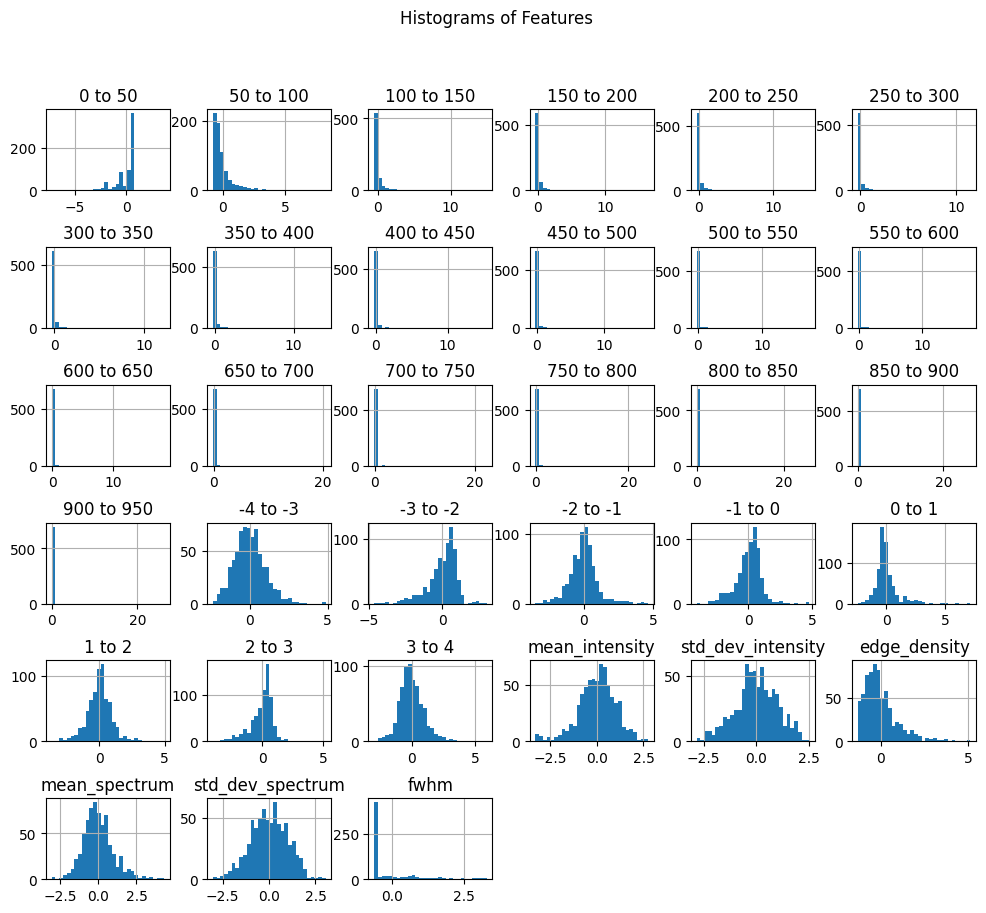

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for each numeric column
axes = full_df.hist(figsize=(12, 10), bins=30)

# Adjust space between rows
plt.subplots_adjust(hspace=0.7)  # Increase hspace for vertical spacing between rows

plt.suptitle('Histograms of Features')
plt.show()


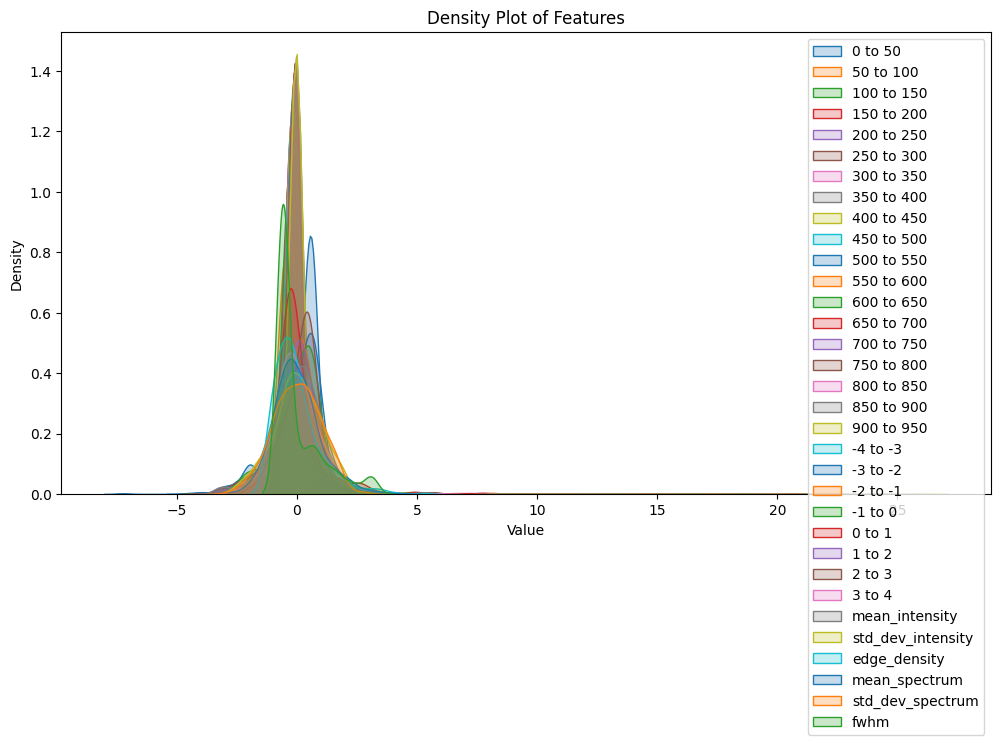

In [ ]:
import seaborn as sns

# Set up the figure
plt.figure(figsize=(12, 6))

# Plot density for each numeric column
for column in full_df.select_dtypes(include=['float64', 'int64']).columns:
    sns.kdeplot(full_df[column], label=column, fill=True)

plt.title('Density Plot of Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:


# Split the data into features (X) and labels (y)
X = full_df
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict labels for testing data
svm_pred = svm_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)

# Evaluate performance
svm_accuracy = accuracy_score(y_test, svm_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)

# Print classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))


SVM Accuracy: 0.7642857142857142
Random Forest Accuracy: 0.8428571428571429
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.79        79
           1       0.73      0.74      0.73        61

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        79
           1       0.78      0.89      0.83        61

    accuracy                           0.84       140
   macro avg       0.84      0.85      0.84       140
weighted avg       0.85      0.84      0.84       140

